# Mehboob Raza
#  Data Science & Business Analytics Task
# Intern @The Sparks Foundation

## Task-prediction using supervised ML(Linear Regression)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading data

link='http://bit.ly/w-data'
data=pd.read_csv(link)

data.head(n=10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#converting data to numpy array
data_array=data.values
print(type(data_array))
print(data_array.shape)
print(data_array)

<class 'numpy.ndarray'>
(25, 2)
[[ 2.5 21. ]
 [ 5.1 47. ]
 [ 3.2 27. ]
 [ 8.5 75. ]
 [ 3.5 30. ]
 [ 1.5 20. ]
 [ 9.2 88. ]
 [ 5.5 60. ]
 [ 8.3 81. ]
 [ 2.7 25. ]
 [ 7.7 85. ]
 [ 5.9 62. ]
 [ 4.5 41. ]
 [ 3.3 42. ]
 [ 1.1 17. ]
 [ 8.9 95. ]
 [ 2.5 30. ]
 [ 1.9 24. ]
 [ 6.1 67. ]
 [ 7.4 69. ]
 [ 2.7 30. ]
 [ 4.8 54. ]
 [ 3.8 35. ]
 [ 6.9 76. ]
 [ 7.8 86. ]]


In [4]:
xdata=data_array[:,0]
ydata=data_array[:,1].astype(int)

In [5]:
u=xdata.mean()   #mean
std=xdata.std()  #standard deviation
xdata=(xdata-u)/std  #normalization formula

In [6]:
print(u)
print(std)
xdata.std() #now it is normalised as standard deviation is 1

5.012
2.47407679751458


1.0

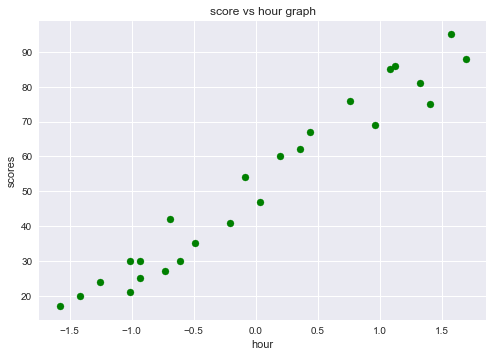

In [7]:
#visualize
plt.style.use('seaborn')

plt.scatter(xdata,ydata,color='green')
plt.title('score vs hour graph')
plt.xlabel('hour')
plt.ylabel('scores')
plt.show()

In [8]:
#split: for test & train data
from sklearn.model_selection import train_test_split  
Xtrain, Xtest, ytrain, ytest = train_test_split(xdata,ydata, 
                            test_size=0.2, random_state=0) 

In [9]:
#reshaping to 2-d dimension
xtrain=Xtrain.reshape(-1,1)
ytrain=ytrain.reshape(-1,1)
xtest=Xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

In [10]:
#implementing linear regression from scratch, without using python package/library 

def hypothesis(x,theta):
    y_= theta[0] + theta[1] * x 
    return y_

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,)) #initializing
    for i in range(m):
        x=X[i]
        y_=hypothesis(x,theta)
        y=Y[i]
        
        grad[0]+=(y_ - y)
        grad[1]+=(y_ - y) * x
        
    return grad/m   


def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        y_=hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return total_error/m  #mean square error    


def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]   #just to store all values from initial to final
    for i in range(max_steps):
        #compute grad
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        
        #update theta(final update)
        theta[0]=theta[0]-learning_rate * grad[0]
        theta[1]=theta[1]-learning_rate * grad[1]
        
        
    return theta,error_list,theta_list   
        
        
    

In [11]:
theta,error_list,theta_list=gradientDescent(xtrain,ytrain)

In [12]:
#theta/weights value for decison line
print(theta)

[51.68898553 24.52037202]


In [13]:
theta_list #it has all values of theta(history of theta)

[(0.0, 0.0),
 (5.3950000000000005, 2.9721227762157487),
 (10.223110228039083, 5.592006835835521),
 (14.544265737888836, 7.900729389027875),
 (18.412029528501414, 9.934634222053749),
 (21.874273370637436, 11.725872216056997),
 (24.973785569648452, 13.302880574359087),
 (27.74881353563387, 14.690807670204272),
 (30.233548181372875, 15.911889650823802),
 (32.45855640984625, 16.985784244444734),
 (34.451167276787984, 17.92986660477198),
 (36.23581681060944, 18.759491483911557),
 (37.83435593426125, 19.48822554202694),
 (39.2663254540456, 20.128053173430207),
 (40.54920165274501, 20.689558848263168),
 (41.69861564305764, 21.18208863105251),
 (42.72854929720542, 21.613893237457166),
 (43.65151026523345, 21.992254724226928),
 (44.478688323960775, 22.32359867099319),
 (45.22009505721813, 22.613593502670128),
 (45.884688652750555, 22.8672384149849),
 (46.480485409146816, 23.08894120033809),
 (47.014659374867115, 23.28258712447492),
 (47.49363138863102, 23.45159987423961),
 (47.923148654099016, 

In [14]:
error_list #error can be reduced to almost zero if other methods are used such as logistic regression

[array([3548.35]),
 array([2830.61189438]),
 array([2259.75148049]),
 array([1805.63632507]),
 array([1444.32917918]),
 array([1156.81187631]),
 array([927.97250733]),
 array([745.80148001]),
 array([600.75332168]),
 array([485.24000435]),
 array([393.22864596]),
 array([319.92205191]),
 array([261.50501046]),
 array([214.94278482]),
 array([177.82104399]),
 array([148.21869511]),
 array([124.60684166]),
 array([105.76848953]),
 array([90.73473186]),
 array([78.73402359]),
 array([69.15185479]),
 array([61.49868622]),
 array([55.38445042]),
 array([50.49827056]),
 array([46.59232677]),
 array([43.46901955]),
 array([40.97075468]),
 array([38.97181276]),
 array([37.3718767]),
 array([36.09087818]),
 array([35.06489337]),
 array([34.24287361]),
 array([33.58404075]),
 array([33.05581142]),
 array([32.63214254]),
 array([32.29221226]),
 array([32.01936803]),
 array([31.80028759]),
 array([31.62430952]),
 array([31.48289903]),
 array([31.36922141]),
 array([31.2778016]),
 array([31.2042521

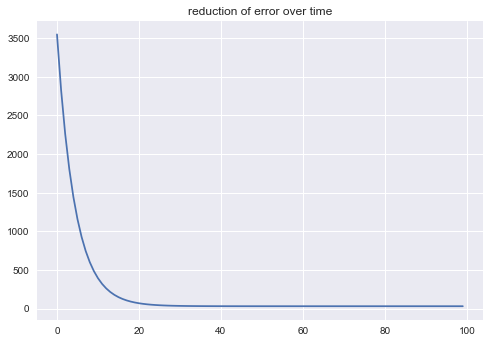

In [15]:
#plotting error and visualizing on graph how it's reducing and then it becaomes constant after point
plt.plot(error_list)
plt.title('reduction of error over time')
plt.show()

In [16]:
#PREDICTIONS(from train data) & BEST LINE
y_=hypothesis(xtrain,theta) 
print(y_) 
#y_=y_.reshape(-1,1)

[[39.67695303]
 [20.84620902]
 [79.32062463]
 [70.40079852]
 [12.9174747 ]
 [52.5611463 ]
 [78.32953284]
 [34.72149408]
 [84.27608358]
 [93.19590969]
 [62.4720642 ]
 [36.70367766]
 [28.77494334]
 [56.52551346]
 [28.77494334]
 [86.25826716]
 [26.79275976]
 [49.58787093]
 [90.22263432]
 [46.61459556]]


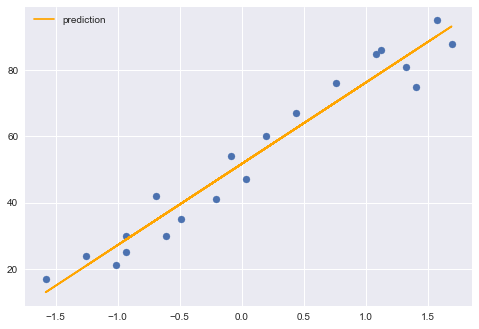

In [17]:
#visualizing best fit line(decision line)  
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,y_,color='orange',label='prediction') #orange line is best line
plt.legend()                               
plt.show()

In [18]:
#making prediction from test data
y_test=hypothesis(xtest,theta)
y_test.shape

(5, 1)

In [19]:
y_test

array([[16.88184186],
       [33.73040229],
       [75.35625747],
       [26.79275976],
       [60.48988062]])

In [20]:
#prediction for studying 9.25 hours
x_=9.25
x_=(x_-u)/std  #normalizing value
pred=hypothesis(x_,theta)
print('score after studying 9.25 hours',pred)

score after for studying 9.25 hours 93.69145558838859


In [21]:
#score: R2(R-squared) or coefficient of determination

def r2_score(Y,Y_):
    #instead of loop np.sum is recommended it's faster
    
    numerator=np.sum((Y-Y_)**2)
    denominator=np.sum((Y-Y.mean())**2)
    
    score=(1-(numerator/denominator))
    
    return score*100

In [22]:
r2_score(ytest,y_test) #we are getting almost 94% accuracy

94.54925879626424